In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
#stemming process in text normalization
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aravindh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#import the dataset
filepath = 'imdb_master.csv'
dataset = pd.read_csv(filepath, encoding = "ISO-8859-1")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
dataset.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [5]:
dataset.columns

Index(['Unnamed: 0', 'type', 'review', 'label', 'file'], dtype='object')

In [7]:
dataset_unsup = dataset[dataset['label'] == "unsup"]
dataset_fair = dataset.drop(dataset_unsup.index, axis=0)

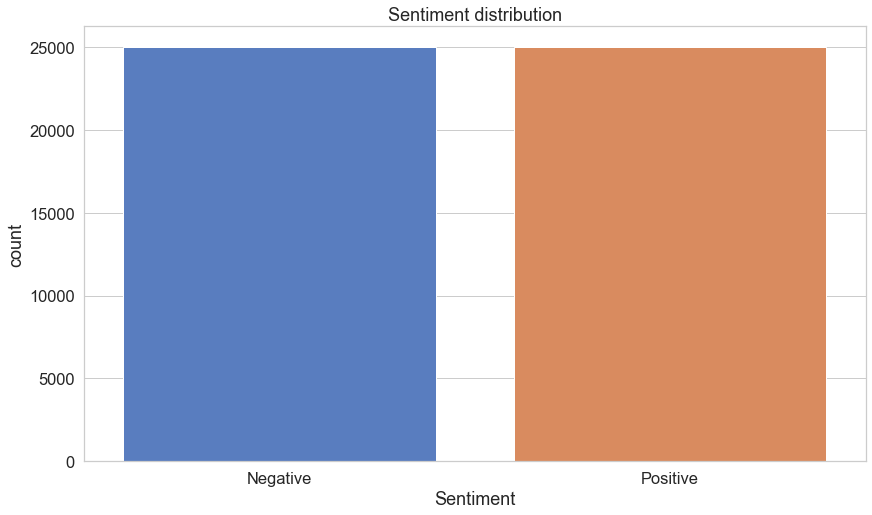

In [8]:
#ploting the share of positive and negative data in trainset
f = sns.countplot(x='label', data=dataset_fair)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("Sentiment");

In [9]:
test = dataset_fair[ dataset_fair['type'] == "test" ]

In [10]:
df_train = dataset_fair[ dataset_fair['type'] == "train"]
df_train_unsup = df_train[df_train['label'] == "unsup"]
train = df_train.drop(df_train_unsup.index, axis=0)

In [11]:
df_train

,Unnamed: 0,type,review,label,file
25000,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
25001,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
25002,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
25003,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
25004,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt
...,...,...,...,...,...
49995,49995,train,"Seeing as the vote average was pretty low, and...",pos,9998_9.txt
49996,49996,train,"The plot had some wretched, unbelievable twist...",pos,9999_8.txt
49997,49997,train,I am amazed at how this movie(and most others ...,pos,999_10.txt
49998,49998,train,A Christmas Together actually came before my t...,pos,99_8.txt


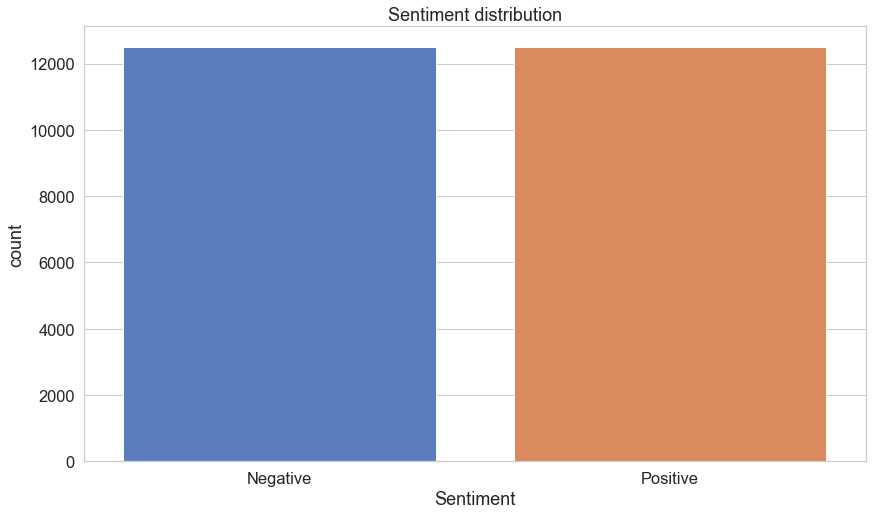

In [12]:
#ploting the share of positive and negative data in trainset
f = sns.countplot(x='label', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("Sentiment");

In [14]:
def stemma(df):

    stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in df:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
def lemma(df):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [16]:
train['review'] = lemma(train['review'])
train['review'] = stemma(train['review'])

C:\Users\Aravindh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
test['review'] = lemma(test['review'])
test['review'] = stemma(test['review'])

<ipython-input-15-afc724e7c473>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[count] = sentence
<ipython-input-17-947ec27c3f1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['review'] = lemma(test['review'])
<ipython-input-14-465891730998>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[count] = sentence
<ipython-input-17-947ec27c3f1c>:2: SettingWith

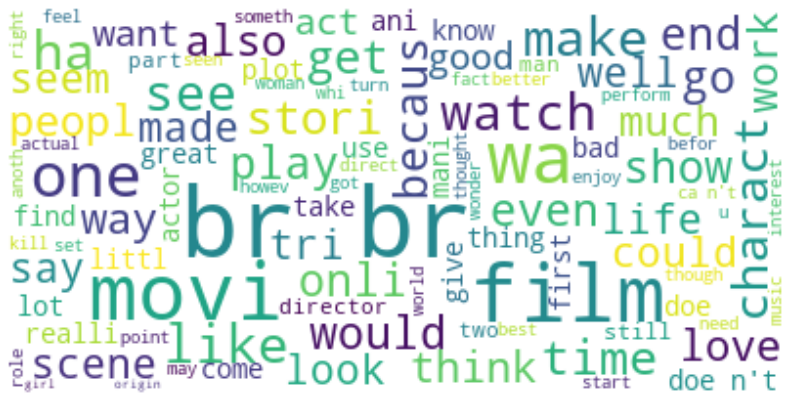

In [18]:
text = " ".join(review for review in train.review)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [29]:
corpus = pd.DataFrame()
corpus['review'] = train['review']
corpus['label'] = train['label']

In [30]:
corpus

,review,label
25000,stori of a man who ha unnatur feel for a pig ....,neg
25001,airport 77 start a a brand new luxuri 747 plan...,neg
25002,this film lack someth i could n't put my finge...,neg
25003,"sorri everyon , , , i know this is suppos to b...",neg
25004,when i wa littl my parent took me along to the...,neg
...,...,...
49995,"see a the vote averag wa pretti low , and the ...",pos
49996,"the plot had some wretch , unbeliev twist . ho...",pos
49997,i am amaz at how this movi ( and most other ha...,pos
49998,"a christma togeth actual came befor my time , ...",pos


In [36]:
from sklearn.preprocessing import LabelEncoder
X = corpus['review'].values
le = LabelEncoder()
y = le.fit_transform(corpus['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

In [38]:
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)

0.8338207519491199


In [56]:
#defining the confusion matrix
import numpy as np

def compute_confusion_matrix(true, pred):
     # Number of classes 
    K = len(np.unique(true))
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    return result

In [58]:
#confusion matrix for the test data
cnf_matrix = compute_confusion_matrix(y_test, preds)
cnf_matrix

array([[2732.,  417.],
       [ 620., 2481.]])

In [43]:
X_real_test = test['review'].values
y_real_test = test['label']
le1 = LabelEncoder()
y_real_test = le1.fit_transform(y_real_test)
preds1 = clfrNB.predict(vect.transform(X_real_test))
score1 = roc_auc_score(y_real_test, preds1)

In [44]:
print(score1)

0.7963600000000001


In [59]:
pred_df = pd.DataFrame()
pred_df['pred'] = preds1
#confusion matrix of  test dataset
cnf_matrix_test = compute_confusion_matrix(y_real_test, preds1)
cnf_matrix_test

array([[10788.,  1712.],
       [ 3379.,  9121.]])

In [64]:
pred_df['pred'].value_counts()

0    14167
1    10833
Name: pred, dtype: int64

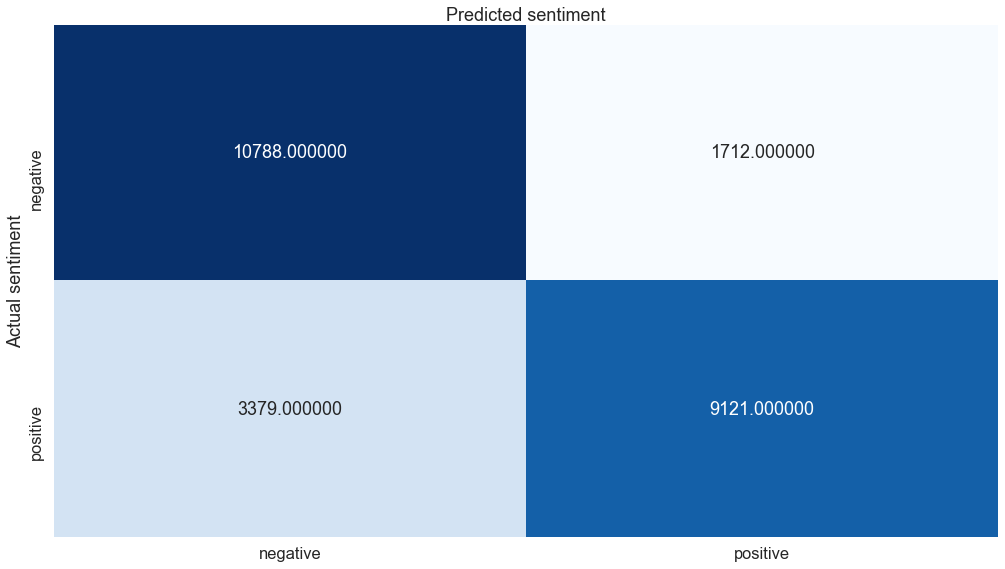

In [61]:
#confusion matrix as plot
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="Blues", fmt="f", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

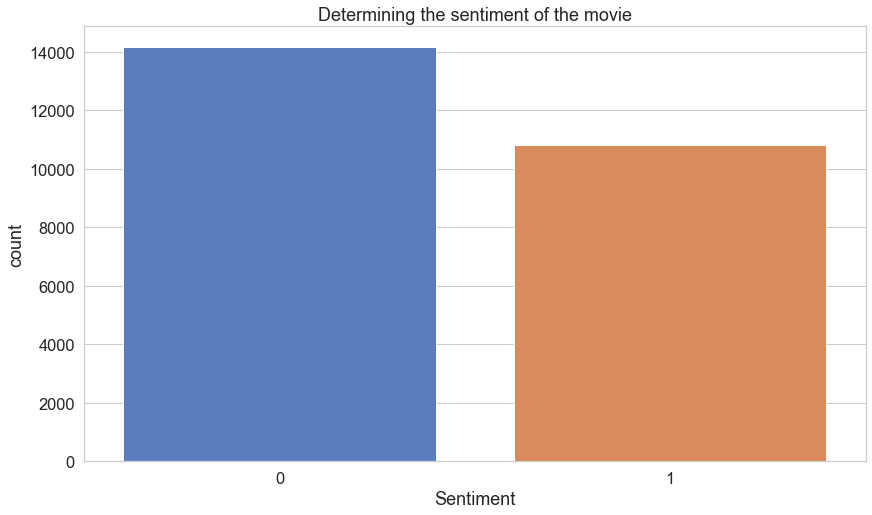

In [62]:
#ploting the share of positive and negative data in trainset
f = sns.countplot(x='pred', data=pred_df)
f.set_title("Determining the sentiment of the movie")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("Sentiment");